AMAZON PRODUCT REVIEW DATASET
----------------------------------------------

Dataset Link : https://www.kaggle.com/datasets/saurav9786/amazon-product-reviews/data

PROJECT TASKS:

1. Import required libraries

2. Create a log_progress function to check how much time the entire process take

3. Read the CSV file with the required columns

4. Perform the below mentioned EDA steps:

    a. Find the top 10 products with highest average ratings
    
    b. Find the bottom 10 products with lowest average ratings
    
    c. Find the customers who have only rated 5 for all the products that they bought
    
    d. Find the customers who have only rated 1 for all the products that they bought
    
    e. Plot a bar graph with the number of times the top 10 products were rated and save it to directory
    
    f. Plot a bar graph with the number of times the bottom 10 products were rated and save it to directory
        
    g. Findout the top 10 customers who rated the most and bottom 10 customers who rated the least.Save the output from into an XLSX with different as sheets - "Most Active Customers to Rate" and "Most inactive Customers to Rate"

In [1]:
#Importing the required libraries to perform Exploratory Data Analysis or EDA

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
!pip install xlsxwriter

In [2]:
# Defining function to log progress

def log_progress(message):
    ''' This function logs the mentioned message at a given stage of the 
    code execution to a log file. Function returns nothing.'''
    
    timestamp_format = '%Y-%b-%d-%H:%M:%S'
    now = datetime.now()
    timestamp = now.strftime(timestamp_format)
    with open("./code_log_amazon_dataset.txt", "a") as f:
        f.write(timestamp + ' : ' + message + '\n')

In [3]:
# Reading the CSV with required columns

"""
The CSV file does not come with headers, we have to define the headers. As per data from Brightdata.com,
the headers are UserID, ProductID, Rating and Timestamp.

"""

log_progress('Extraction Started - Loading data from CSV') 

column_names = ['UserID', 'ProductID', 'Rating','Timestamp'] # Naming the columns for Dataframe

df = pd.read_csv("ratings_Electronics.csv", header = None, names = column_names, usecols = [0,1,2])

log_progress('Extraction Ended - Loaded data from CSV')

log_progress('EDA process for the day started')

In [4]:
# EDA Task 4.a -- Find the top 10 products with highest average ratings

# Group by ProductID and calculate the average rating for each product
average_ratings = df.groupby('ProductID')['Rating'].mean()

# Sort the products by average rating in descending order
sorted_ratings = average_ratings.sort_values(ascending=False)

# Select the top 10 products
top_10_products = sorted_ratings.head(10)

# Display the top 10 products with the highest average ratings
print('Top 10 Product IDs:',"\n",top_10_products,"\n")

Top 10 Product IDs: 
 ProductID
0132793040    5.0
B004SGH244    5.0
B004SQBRRM    5.0
B004SQC6O0    5.0
B004SQE6YI    5.0
B004SQFFCK    5.0
B004SQOR0G    5.0
B004SQVHU4    5.0
B004SQX8W4    5.0
B004SQYSUK    5.0
Name: Rating, dtype: float64 



In [5]:
# EDA Task 4.b -- Find the bottom 10 products with lowest average ratings

# Group by ProductID and calculate the average rating for each product
average_ratings = df.groupby('ProductID')['Rating'].mean()

# Sort the products by average rating in ascending order
sorted_ratings = average_ratings.sort_values(ascending=True)

# Select the bottom 10 products
bottom_10_products = sorted_ratings.head(10)

# Display the top 10 products with the highest average ratings
print('Bottom 10 Product IDs:',"\n",bottom_10_products,"\n")

Bottom 10 Product IDs: 
 ProductID
B008ANKWMA    1.0
B0021HEJKC    1.0
B00FAVJXUW    1.0
B00J5ARFNG    1.0
B008LT3D6A    1.0
B008LT2WZI    1.0
B0021MI8EA    1.0
B0021NN74U    1.0
B0000AC8A2    1.0
B0021O5FFI    1.0
Name: Rating, dtype: float64 



In [6]:
# EDA Task 4.c -- Find the top 10 customers who have only rated 5 for all the products that they bought

""" 

Note: Below, the commented one is the bad way of doing this task. The code took a long time and failed, 
for a few reasons, especially in a Jupyter Notebook, because of size of our dataset and the structure of our code. 
Here are possible reasons:

1. Large Dataset: If the dataset contains a lot of rows (millions of records)

2. Applying a lambda function over each group may be slow.

3. GroupBy Operation: Grouping data on a large dataset can be expensive, especially when combined with 
a function like apply(), which is not vectorized (i.e., it doesn't take full advantage of pandas' optimized 
operations).

4. Memory Constraints: Jupyter Notebooks may be memory-intensive. If your dataset is large, the system may 
be swapping memory between disk and RAM, causing delays.

5. Not limiting the output of dataframe to a required number like top 10.


"""

# # Group the data by 'UserID' and check if all their ratings are 5
# # Use groupby to create groups of ratings per user, and then apply the all() function to check if all ratings are 5
# users_with_all_5_ratings = df.groupby('UserID')['Rating'].apply(lambda x: (x == 5).all())

# # Filter to get only those users who have all ratings as 5
# user_with_all_5_ratings = users_with_all_5_ratings[users_with_all_5_ratings]

# # Get the list of such customer IDs
# user_ids = users_with_all_5_ratings.index.tolist()

# # Print or work with the list of customers
# print("\n","Customers who rated only 5 for all products:", user_ids)

""" 

Note: Below is the appropriate way of doing this task with code optimization. 

1. Vectorization: We are avoiding the usage of apply() and instead using vectorized operations, which are much
faster in pandas.

2. Efficient Filtering: We are first filtering the dataset for Rating == 5 and then grouping the data.

"""

# Find customers who only rated 5

# First filter the customers who rated only 5 and count their total ratings
customer_total_ratings = df.groupby('UserID')['Rating'].count()
customer_5_ratings = df[df['Rating'] == 5].groupby('UserID')['Rating'].count()


# Reindex customer_5_ratings to match the total ratings index and fill missing values with 0
customer_5_ratings = customer_5_ratings.reindex(customer_total_ratings.index, fill_value=0)


# Keep only customers where total ratings equal the number of 5 ratings
customers_with_all_5_ratings = customer_5_ratings[customer_5_ratings == customer_total_ratings]

# Sort by the number of ratings and select the top 10 customers
top_10_customers_with_all_5_ratings = customers_with_all_5_ratings.sort_values(ascending=False).head(10)

# Get the list of such customer IDs
top_10_customer_ids = top_10_customers_with_all_5_ratings.index.tolist()

# Print the top 10 customers who rated only 5 for all products
print("\n","Top 10 customers who rated only 5 for all products:", top_10_customer_ids)


 Top 10 customers who rated only 5 for all products: ['A2DKQQIZ793AV5', 'A2TN0U8173HM7A', 'A2PB325LKXYDOL', 'A2J4XMWKR8PPD0', 'A23WPWLYT3P1CZ', 'A3DL29NLZ7SXXG', 'A251OKWDZIA702', 'A18BMA5D7WJ5SA', 'AD9BYAJEDZXVZ', 'A34VM6OQHV6ROZ']


In [7]:
# EDA Task 4.d -- Find the top 10 customers who have only rated 1 for all the products that they bought

# Find customers who only rated 1

# First filter the customers who rated only 1 and count their total ratings
customer_total_ratings = df.groupby('UserID')['Rating'].count()
customer_1_ratings = df[df['Rating'] == 1].groupby('UserID')['Rating'].count()


# Reindex customer_1_ratings to match the total ratings index and fill missing values with 0
customer_1_ratings = customer_1_ratings.reindex(customer_total_ratings.index, fill_value=0)


# Keep only customers where total ratings equal the number of 1 ratings
customers_with_all_1_ratings = customer_1_ratings[customer_1_ratings == customer_total_ratings]

# Sort by the number of ratings and select the top 10 customers
top_10_customers_with_all_1_ratings = customers_with_all_1_ratings.sort_values(ascending=False).head(10)

# Get the list of such customer IDs
top_10_customer_ids = top_10_customers_with_all_1_ratings.index.tolist()

# Print the top 10 customers who rated only 1 for all products
print("\n","Top 10 customers who rated only 1 for all products:", top_10_customer_ids)


 Top 10 customers who rated only 1 for all products: ['A2TCHRBAIPU5G3', 'A2YP2H6O13BSXX', 'A1G1AFIMEVETKK', 'A1FZNDLAB1BWB2', 'A2U38J8EIZQ29A', 'AG3PX0SR2948A', 'A14G7W2YFFNM43', 'A2AGGWPJZODA0A', 'ANGETSCA4N4M8', 'A2IPVL2ZMRK98Q']


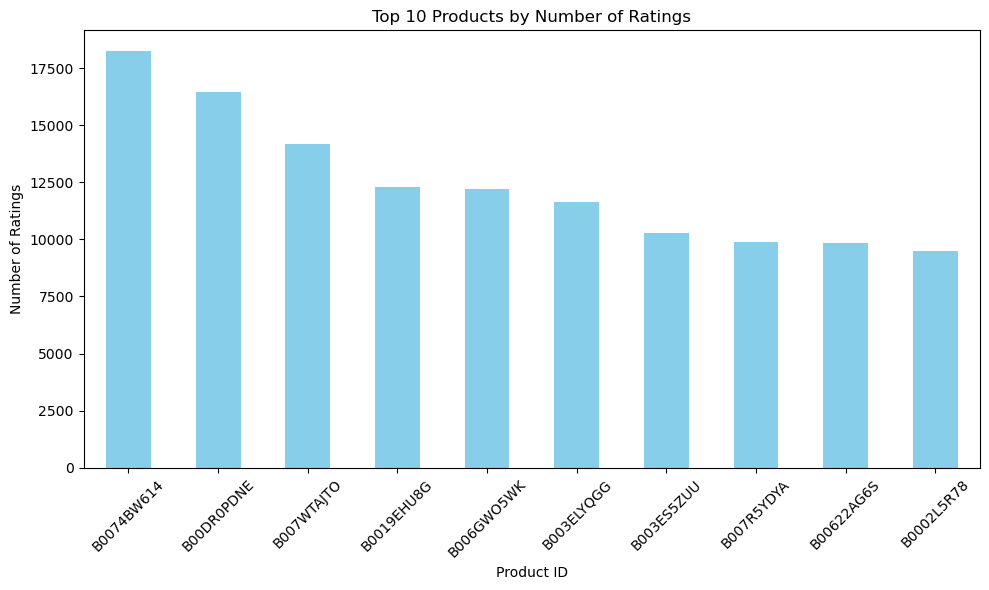

In [8]:
# EDA Task 4.e -- Plot a bar graph with the number of times the top 10 products were rated and save it to directory

# Count the number of ratings for each product
product_ratings_count = df.groupby('ProductID')['Rating'].count()

# Sorting the products by number of ratings and selecting top 10
top_10_products = product_ratings_count.sort_values(ascending=False).head(10)

# Plotting a bar graph of the top 10 products by the number of ratings
plt.figure(figsize=(10,6))
top_10_products.plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Top 10 Products by Number of Ratings')
plt.xlabel('Product ID')
plt.ylabel('Number of Ratings')

# Prep the plot
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
save_path = '/Users/luckythawani/Downloads/Study Material/Python All resources/Practice Codes/top_10_products.png'
plt.savefig(save_path, format = 'png', dpi = 300)

# Show the plot
plt.show()


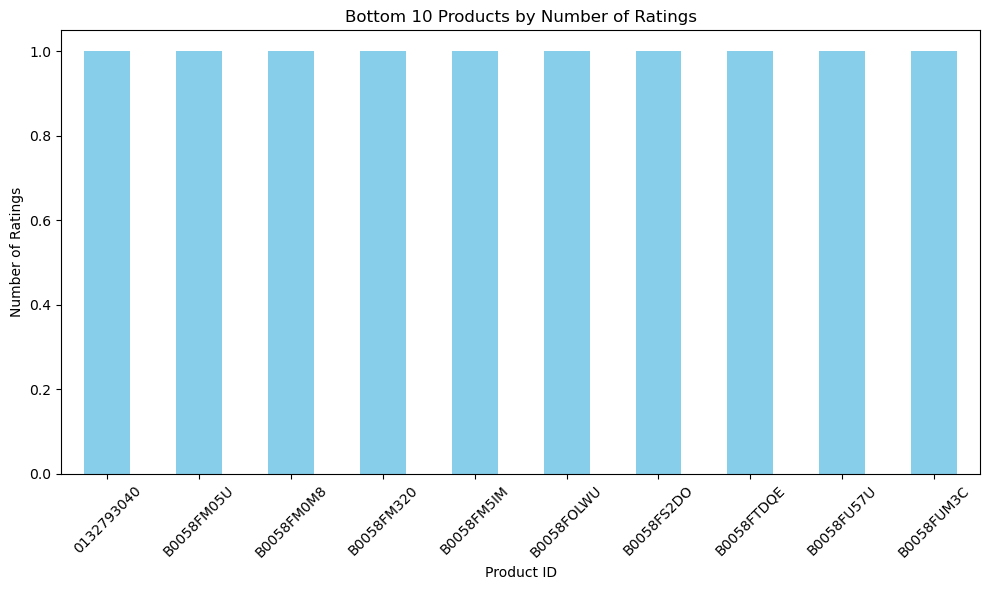

In [9]:
# EDA Task 4.f -- Plot a bar graph with the number of times the bottom 10 products were rated

# Count the number of ratings for each product
bottom_product_ratings_count = df.groupby('ProductID')['Rating'].count()

# Sorting the products by number of ratings and selecting bottom 10
bottom_10_products = bottom_product_ratings_count.sort_values(ascending=True).head(10)

# Plotting a bar graph of the bottom 10 products by the number of ratings
plt.figure(figsize=(10,6))
bottom_10_products.plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Bottom 10 Products by Number of Ratings')
plt.xlabel('Product ID')
plt.ylabel('Number of Ratings')

# Prep the plot
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
save_path = '/Users/luckythawani/Downloads/Study Material/Python All resources/Practice Codes/bottom_10_products.png'
plt.savefig(save_path, format = 'png', dpi = 300)

# Show the plot
plt.show()

In [10]:
# EDA Task 4.g

"""
Findout the top 10 customers who rated the most and bottom 10 customers who rated the least. Save the output from into an XLSX with 
different as sheets - "Most Active Customers to Rate" and "Most inactive Customers to Rate"
"""

# Most Active customers to provide rating

active_customers = df.groupby('UserID')['Rating'].count()
top_10_active_customers = active_customers.sort_values(ascending=False).head(10)

# Most inctive customers to provide rating

inactive_customers = df.groupby('UserID')['Rating'].count()
top_10_inactive_customers = inactive_customers.sort_values(ascending=True).head(10)

# Saving the output to an XLSX

output_file = 'top_and_bottom_customers_to_provide_rating.xlsx'

with pd.ExcelWriter(output_file, engine='xlsxwriter') as writer:
    # Write the details of most active customers to the first sheet
    top_10_active_customers.to_frame('Number of Ratings').to_excel(writer, sheet_name='Most active customers to rate', index=True)

    # Write the details of the most inactive customers to the second sheet
    top_10_inactive_customers.to_frame('Number of Ratings').to_excel(writer, sheet_name='Most inactive customers to rats', index=True)

print(f"Data saved successfully to {output_file}")

Data saved successfully to top_and_bottom_customers_to_provide_rating.xlsx


In [11]:
log_progress('EDA process for the day ended')